<a href="https://colab.research.google.com/github/cvrl10/MLA_CPA/blob/main/FinalProject_Regression_CPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project**

**CS430-ON**

**Machine Learning in the Cloud**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Imports for specific models

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


##Imports for Splitting Data and Building Pipeline

In [46]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

##Imports for Performance Measures

In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##Acquire Data

In [48]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/FinalProject/real_estate.csv')

##Statistics and Visual Exploration

In [49]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [50]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [51]:
df.sample(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
318,319,2013.333,7.1,379.55750,10,24.98343,121.53762,49.8
384,385,2012.750,16.1,4066.58700,0,24.94297,121.50342,12.9
347,348,2013.583,17.4,6488.02100,1,24.95719,121.47353,11.2
192,193,2013.167,43.8,57.58945,7,24.96750,121.54069,42.7


In [52]:
column_name = list(df.columns[0:2])

In [53]:
df.drop(labels=column_name, axis=1, inplace=True)

In [54]:
column_name = {'X2 house age':'house_age', 
               'X3 distance to the nearest MRT station':'nearest_MRT_station',	
               'X4 number of convenience stores':'convenience_stores',	
               'X5 latitude':'latitude',
               'X6 longitude':'longitude',
               'Y house price of unit area':'price_per_unit_area'}

In [55]:
df.rename(columns=column_name, inplace=True)

In [56]:
df.describe()

,house_age,nearest_MRT_station,convenience_stores,latitude,longitude,price_per_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


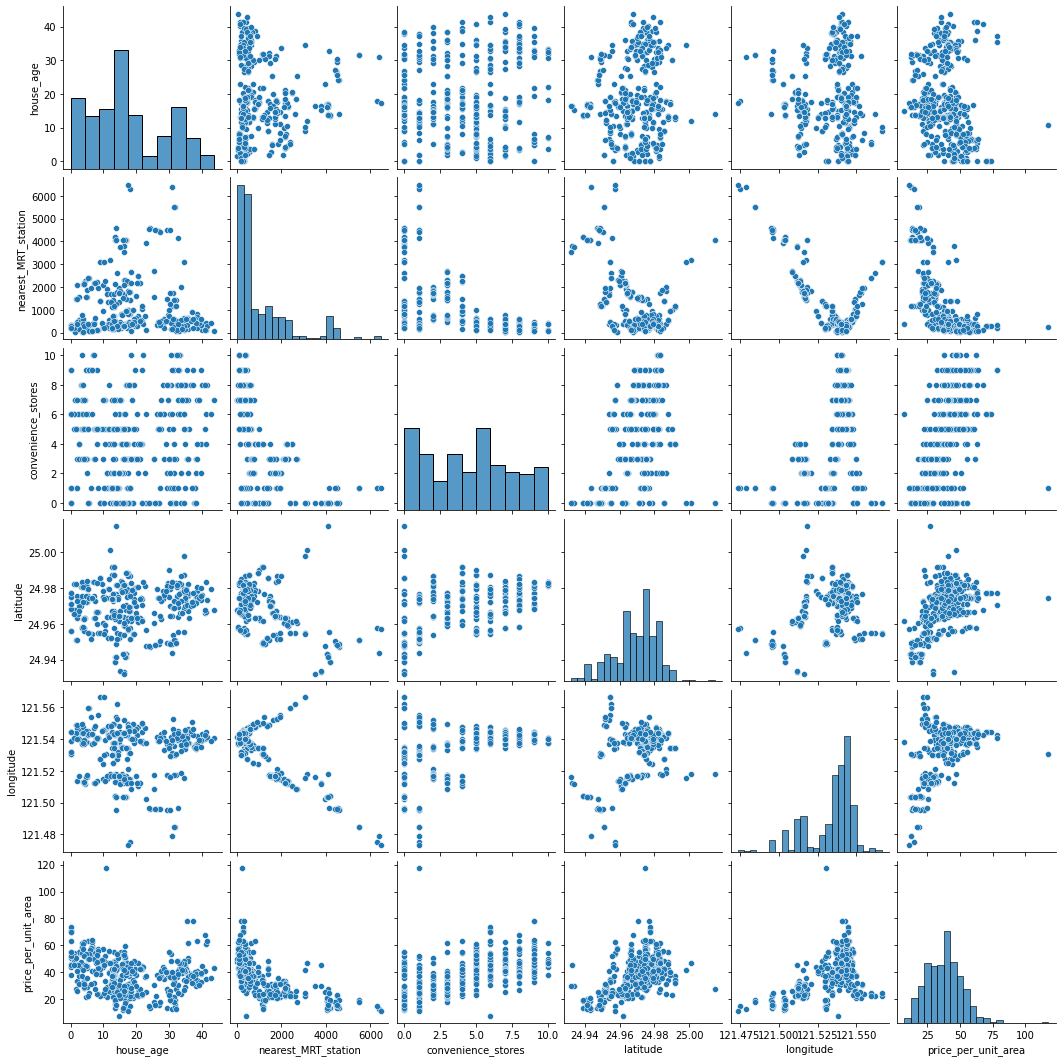

In [57]:
sns.pairplot(df)

In [58]:
latitude = df['latitude']
longitude = df['longitude']

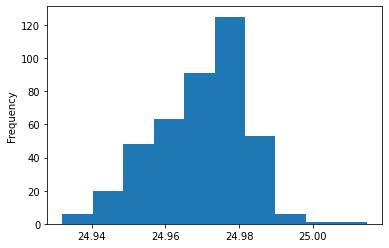

In [59]:
latitude.plot(kind='hist')

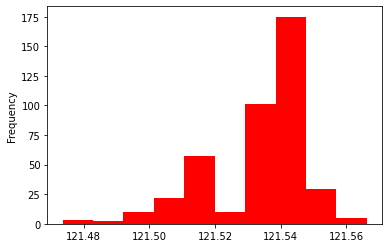

In [60]:
longitude.plot(kind='hist', color='red')

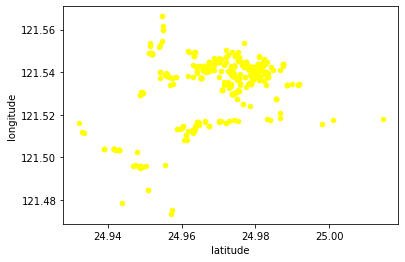

In [61]:
df.plot(x='latitude',y='longitude', kind='scatter', color='yellow')

This figure shows the location of all the houses and there location on a map

##Exploratory Analysis

There appears to be a cluster around 24, 121, I’ll assume that with these houses being closer together they’ll be cheaper due to lack of acreage.

In [62]:
avg = df['price_per_unit_area'].mean()

In [63]:
new_feature = df['price_per_unit_area'].apply(lambda x: 1 if x < avg else 0)

In [64]:
series = pd.Series(new_feature, name='price_per_unit_area_lessthan_avg')

In [65]:
series

0      1
1      0
2      0
3      0
4      0
      ..
409    1
410    0
411    0
412    0
413    0
Name: price_per_unit_area_lessthan_avg, Length: 414, dtype: int64

In [66]:
temp_df = df.join(series)

In [67]:
temp_df

,house_age,nearest_MRT_station,convenience_stores,latitude,longitude,price_per_unit_area,price_per_unit_area_lessthan_avg
0,32.0,84.87882,10,24.98298,121.54024,37.9,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,0
2,13.3,561.98450,5,24.98746,121.54391,47.3,0
3,13.3,561.98450,5,24.98746,121.54391,54.8,0
4,5.0,390.56840,5,24.97937,121.54245,43.1,0
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,1
410,5.6,90.45606,9,24.97433,121.54310,50.0,0
411,18.8,390.96960,7,24.97923,121.53986,40.6,0
412,8.1,104.81010,5,24.96674,121.54067,52.5,0


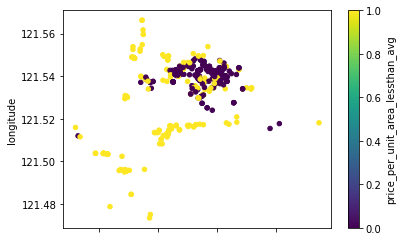

In [68]:
temp_df.plot.scatter(x='latitude', y='longitude', c='price_per_unit_area_lessthan_avg', colormap='viridis')

This figure correlates to what I was expecting, here I’ve color coded the houses that are less than the avg price and it seems that the more expensive houses are further out from the cluster.

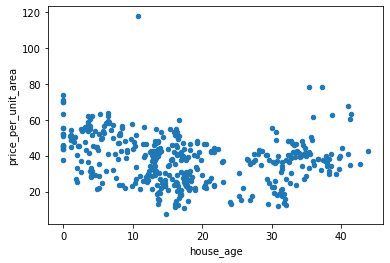

In [69]:
df.plot.scatter(x='house_age', y='price_per_unit_area')

There seems to be a quadratic relationship between house age and price, at some point newer house are expensive but at some point the price of older house starts to increase, this could be due to the location of those houses. 

In [70]:
df

,house_age,nearest_MRT_station,convenience_stores,latitude,longitude,price_per_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


##Splitting Data into Train/Test

In [71]:
X = df.iloc[:,:-1]
y = df['price_per_unit_area']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

##Building the Pipelines

In [73]:
num_attributes = list(X.columns)

In [74]:
col_transformer = ColumnTransformer(transformers=[
                                                 ('num', MinMaxScaler(), num_attributes)
      ])

Building Linear Pipeline

In [75]:
linear_pipeline = Pipeline([
                  ('transformer', col_transformer),
                  ('lr', LinearRegression())
    ])

Building SVM Pipeline with GridSearch

In [76]:
svr_pipeline = Pipeline([
              ('transformer', col_transformer),
              ('svr', SVR()) 
    ])

In [77]:
param_grid = {'svr__kernel':['linear', 'poly'], 'svr__max_iter':[100_000, 10_000]}
grid_pipeline = GridSearchCV(svr_pipeline, param_grid)

##Executing the Models

In [78]:
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['house_age',
                                                   'nearest_MRT_station',
                                                   'convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('lr', LinearRegression())])

In [79]:
grid_pipeline.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['house_age',
                                                                          'nearest_MRT_station',
                                                                          'convenience_stores',
                                                                          'latitude',
                                                                          'longitude'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__kernel': ['linear', 'poly'],
                         'svr__max_iter': [100000, 10000]})

##Evaluating the Models

Evaluating Linear Pipeline

In [80]:
y_pred = linear_pipeline.predict(X_test)

In [81]:
print(mean_squared_error(y_pred, y_test)**0.5)
print(mean_squared_error(y_train, linear_pipeline.predict(X_train))**0.5)

8.67126354325823
8.963040658690009


A low RMSE indicates that the model fit the data really well.

Evaluating SVM Pipeline with GridSearch

In [82]:
y_pred = grid_pipeline.predict(X_test)

In [83]:
print(mean_squared_error(y_pred, y_test)**0.5)
print(mean_squared_error(y_train, grid_pipeline.predict(X_train))**0.5)

7.823926300066891
8.04307306283436


In [84]:
grid_pipeline.best_params_

{'svr__kernel': 'poly', 'svr__max_iter': 100000}

##Comparing the performance 

Both of these models performed equally as well as the other, with a low RMSE we can say that the models on average predicts values that extremely close to the expected results. 

##Conclusion

These models are excellent at predicting price per unit area, the SVM GridSearch only slightly outperforms the Linear Regression model so either of them could be used to predict. It’s intuitive to think that the GridSearch would outperform the Linear Regression since we are changing various hyperparameters to obtain the best fit.